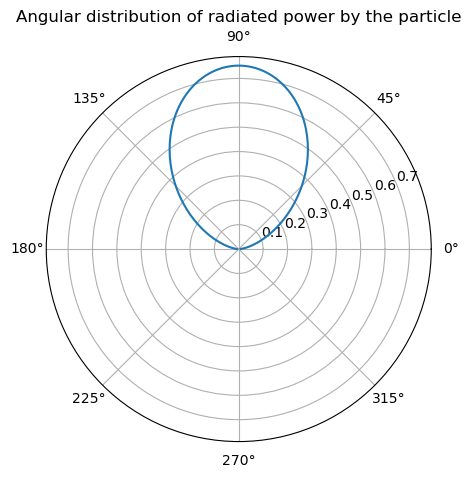

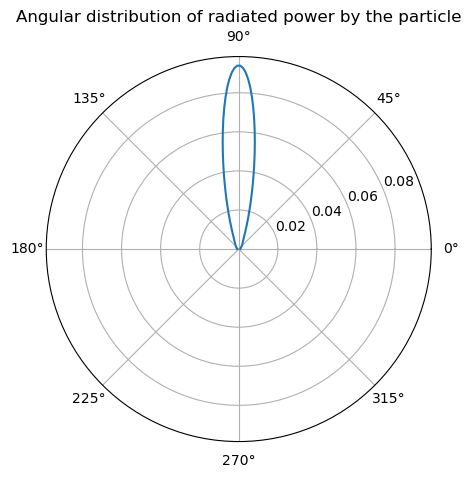

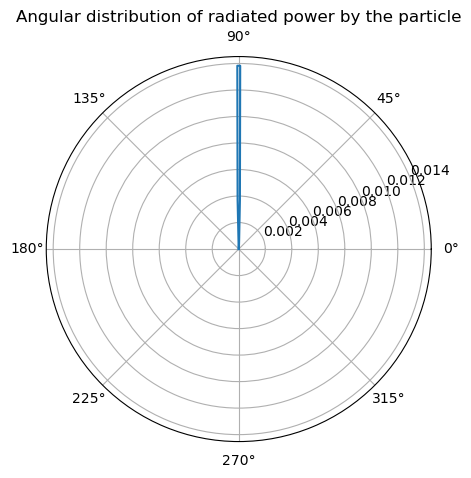

In [4]:
import numpy as np
import matplotlib.pyplot as plt
q = 1.6e-19 #charge of the particle
c = 3e8     #speed of light in m/s

#velocity and acceleration of the charge
vx_values = [0.1*c,0.9*c,0.999*c]       #velocity along x
a_z = 0.3 * c       # acceleration along z
for v_x in vx_values:
# Beta and beta_dot
   beta = np.array([v_x/c, 0, 0])
   beta_dot = np.array([0, 0, a_z/c])

# Angular grid
   theta = np.linspace(0, np.pi, 200)       # polar angle
   phi = np.linspace(0, 2*np.pi, 200)       # azimuthal angle
   Theta, Phi = np.meshgrid(theta, phi)

# Unit vector n (observer's direction)
   n_x = np.sin(Theta) * np.cos(Phi)
   n_y = np.sin(Theta) * np.sin(Phi)
   n_z = np.cos(Theta)
   n_vec = np.stack([n_x, n_y, n_z], axis=-1)   # shape (Nphi, Ntheta, 3)
# dP/dOmega( power per unit solid angle)
   term = np.cross(n_vec - beta, beta_dot)
   num = np.linalg.norm(np.cross(n_vec, term), axis=-1)**2
   den = (1 - np.tensordot(n_vec, beta, axes=([2],[0])) )**5
   dP_dOmega = (q**2 / (4*np.pi*c)) * num / den
  
# Normalize for plotting
   dP_dOmega /= np.max(dP_dOmega)

# Plot polar distribution in theta 
   dP_theta = np.mean(dP_dOmega, axis=0)
   plt.figure(figsize=(7,5))
   plt.polar(theta, dP_theta)
   plt.title("Angular distribution of radiated power by the particle")
plt.show()

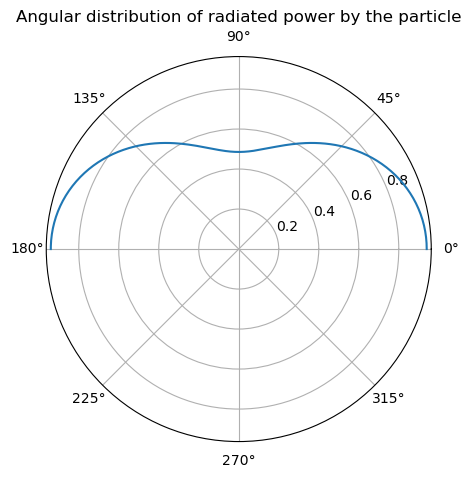

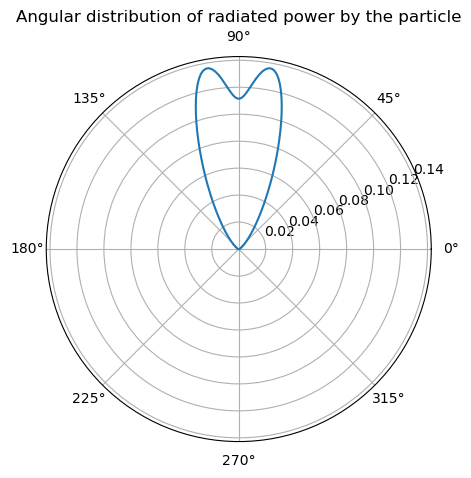

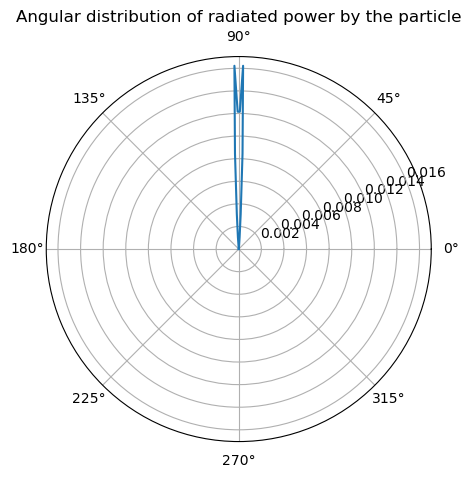

In [3]:
# velocity and acceleration of charged particle
vx_values = [0.1*c,0.9*c,0.999*c]      # velocity along x
a_x = 0.9 * c       # acceleration along x
for v_x in vx_values:
# Beta and beta_dot
  beta = np.array([v_x/c, 0, 0])
  beta_dot = np.array([a_x/c, 0, 0])

# Angular grid
  theta = np.linspace(0, np.pi, 200)       # polar angle
  phi = np.linspace(0, 2*np.pi, 200)       # azimuthal angle
  Theta, Phi = np.meshgrid(theta, phi)

# Unit vector n(observer's direction)
  n_x = np.sin(Theta) * np.cos(Phi)
  n_y = np.sin(Theta) * np.sin(Phi)
  n_z = np.cos(Theta)
  n_vec = np.stack([n_x, n_y, n_z], axis=-1)   # shape (Nphi, Ntheta, 3)
# dP/dOmega( power per unit solid angle)
  term = np.cross(n_vec - beta, beta_dot)
  num = np.linalg.norm(np.cross(n_vec, term), axis=-1)**2
  den = (1 - np.tensordot(n_vec, beta, axes=([2],[0])) )**5
  dP_dOmega = (q**2 / (4*np.pi*c)) * num / den

# Normalize for plotting
  dP_dOmega /= np.max(dP_dOmega)

# Plot polar distribution in theta 
  dP_theta = np.mean(dP_dOmega, axis=0)
  plt.figure(figsize=(7,5))
  plt.polar(theta, dP_theta)
  plt.title("Angular distribution of radiated power by the particle")
plt.show()
